importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import zipfile
import cv2
import plotly.express as px

In [ ]:
%matplotlib inline

Reading dataset

In [ ]:
df = pd.read_csv('/content/sales_data_sample.csv', encoding = 'unicode_escape', parse_dates=['ORDERDATE'])

Data Preprocessing

In [ ]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [ ]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
df_drop = ['CUSTOMERNAME', 'PHONE', 'ORDERNUMBER',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',]
df = df.drop(df_drop, axis = 1)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [ ]:
df.shape

(2823, 14)

In [ ]:
df.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

Data visualization

In [ ]:
def Visualization(x):
  fig = plt.Figure(figsize = (12,6))
  fig = px.bar(x = df[x].value_counts().index, y = df[x].value_counts(), color = df[x].value_counts().index, height = 600)
  fig.show();

Visualization('COUNTRY')

In [ ]:
Visualization('STATUS');

In [ ]:
#DROP UNBALANCED FEATURE
df.drop(columns = ['STATUS'], axis = 1, inplace = True)
print('Columns resume:',df.shape[1])

Columns resume: 13


In [ ]:
Visualization('PRODUCTLINE')

In [ ]:
Visualization('DEALSIZE')

In [ ]:
#PREPARE DATA

def dummies(x):
  dummy = pd.get_dummies(df[x])
  df.drop(columns = x, inplace = True)
  return pd.concat([df,dummy], axis = 1)

df = dummies('COUNTRY')
df = dummies('PRODUCTLINE')
df = dummies('DEALSIZE')

df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y = pd.Categorical(df['PRODUCTCODE'])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [ ]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_group = df.groupby(by = 'ORDERDATE').sum()
fig = px.line(x = df_group.index, y = df_group.SALES, title = 'sales_peak')
fig.show();

In [ ]:
df.drop('ORDERDATE', axis = 1, inplace = True)

In [ ]:
df.drop('QTR_ID', axis = 1, inplace = True)

In [ ]:
df.shape

(2823, 37)

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [ ]:
scores = []
range_values = range(1,15)
for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores.append(kmeans.inertia_)

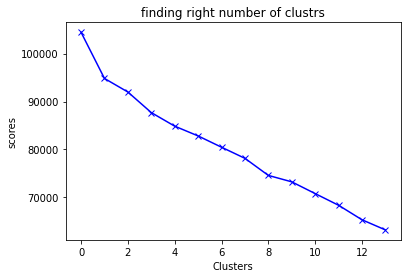

In [ ]:
plt.plot(scores, 'bx-')
plt.title('finding right number of clustrs')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show();

In [ ]:
#the elbow method

kmeans = KMeans(4)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [ ]:
labels = kmeans.labels_
labels

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape

(4, 37)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [df.columns])

In [ ]:
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.290759,0.579855,-0.005705,0.459506,-0.000661,-0.015242,0.376333,-0.157764,-0.008343,-0.140961,...,0.074419,-0.011184,-0.047184,-0.014231,-0.049653,0.065816,-0.061707,-0.242672,1.019676,-0.912100
1,-0.464873,-0.726927,0.045387,-0.809700,0.014003,0.001119,-0.583091,0.284884,0.030238,-0.140961,...,-0.161561,0.017918,0.070006,0.053419,0.076167,-0.044606,0.087077,-0.242672,-0.980703,1.096370
2,0.081943,0.142367,-0.153367,0.065149,-0.035235,0.030410,0.055497,-0.206998,-0.264819,7.094172,...,0.236012,-0.081879,0.002237,-0.036861,-0.167454,-0.050918,-0.080814,0.074670,0.074042,-0.108712
3,1.223882,0.799961,-0.268121,2.575220,-0.096798,0.114838,1.449091,-0.874499,-0.079937,-0.140961,...,0.586589,-0.019085,-0.159457,-0.300637,-0.127328,-0.197232,-0.141557,4.120788,-0.980703,-0.912100


In [ ]:
#invert the data
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,37.924723,95.354635,6.442066,4400.087188,7.090037,2003.804428,115.836900,48.791144,6.346863e-02,2.359224e-16,...,0.377860,0.113653,0.093727,7.896679e-02,0.019188,0.126937,0.189668,7.285839e-16,1.000000e+00,-1.665335e-16
1,30.565079,68.995913,6.657937,2062.794444,7.143651,2003.815873,77.286508,62.769841,7.301587e-02,2.255141e-16,...,0.265873,0.123016,0.130159,9.761905e-02,0.039683,0.092857,0.250794,6.800116e-16,-1.054712e-15,1.000000e+00
2,35.890909,86.530182,5.818182,3673.864182,6.963636,2003.836364,102.945455,47.236364,1.387779e-17,1.000000e+00,...,0.454545,0.090909,0.109091,7.272727e-02,0.000000,0.090909,0.181818,7.272727e-02,5.272727e-01,4.000000e-01
3,47.013072,99.794314,5.333333,8296.256078,6.738562,2003.895425,158.941176,26.156863,4.575163e-02,-4.510281e-17,...,0.620915,0.111111,0.058824,-9.714451e-17,0.006536,0.045752,0.156863,1.000000e+00,-7.216450e-16,1.332268e-15


In [ ]:
sales_of_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
sales_of_cluster.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,0
